In [952]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Below is population data by sex and single year of age for July 1, 2019. It is calld 'Single Year of Age and Sex Population Estimates: April 1, 2010 to July 1, 2019 - CIVILIAN (SC-EST2019-AGESEX-CIV)'. This will be used to merge with the COVID death data to calculate death rates.

In [953]:
pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/asrh/sc-est2019-agesex-civ.csv')
pop = pop[pop.SEX == 0]
pop = pop[['NAME','AGE','POPEST2019_CIV']]
popkeep = pop
pop.columns = ['NAME','AGE','Population']
pop['AgeGroup'] = pd.cut(pop['AGE'], bins = [-1, 24, 34, 44, 54, 64, 74, 84, 85, 9999],
       labels = ['0-24','25-34','35-44','45-54','55-64','65-74','75-84','85+','All Ages'])
population = pop.groupby(['NAME','AgeGroup'])['Population'].sum().reset_index()

In [954]:
Biggest = population[population.AgeGroup == 'All Ages'].sort_values('Population', ascending = False)['NAME']
def get_biggest_states(number = 10):
    number = number + 1
    return Biggest[:number]

In [955]:
center = pd.read_csv("https://www2.census.gov/geo/docs/reference/cenpop2010/CenPop2010_Mean_ST.txt")
also = pd.read_csv("https://www2.census.gov/geo/docs/reference/cenpop2010/CenPop2010_Mean_US.txt")
also['STNAME'] = 'United States'
center = center.append(also)
center = center[['STNAME','LATITUDE','LONGITUDE']]
center

,STNAME,LATITUDE,LONGITUDE
0,Alabama,33.008097,-86.756826
1,Alaska,61.399882,-148.873973
2,Arizona,33.368266,-111.864310
3,Arkansas,35.142580,-92.655243
4,California,35.463595,-119.325359
5,Colorado,39.513420,-105.208056
6,Connecticut,41.497001,-72.870342
7,Delaware,39.358946,-75.556835
8,District of Columbia,38.910270,-77.014468
9,Florida,27.822726,-81.634654


# 1 Data 

This is the 'Conditions Contributing to COVID-19 Deaths, by State and Age' dataset from NCHS. This is the updated on June 2, 2021 edition. This dataset shows health conditions and contributing causes mentioned in conjunction with deaths involving coronavirus disease 2019 (COVID-19) by age group and jurisdiction of occurrence. 

Footnote from website:

Number of conditions reported in this table are tabulated from deaths received and coded as of the date of analysis and do not represent all deaths that occurred in that period. Data during this period are incomplete because of the lag in time between when the death occurred and when the death certificate is completed, submitted to NCHS and processed for reporting purposes. This delay can range from 1 week to 8 weeks or more. Conditions contributing to the death were identified using the International Classification of Diseases, Tenth Revision (ICD-10). Deaths involving more than one condition (e.g., deaths involving both diabetes and respiratory arrest) were counted in both totals. To avoid counting the same death multiple times, the numbers for different conditions should not be summated. Deaths with confirmed or presumed COVID-19, coded to ICD–10 code U07.1. “COVID-19 Deaths” represents the number of deaths that mention one or more of the conditions indicated. The “Number of Mentions” column represents the number of total conditions mentioned for each age group.

In [956]:
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age.csv')

In [957]:
df.shape

(248400, 14)

In [958]:
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,05/30/2021,01/01/2020,05/29/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,409.0,426.0,NaN
1,05/30/2021,01/01/2020,05/29/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1865.0,1911.0,NaN
2,05/30/2021,01/01/2020,05/29/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4961.0,5090.0,NaN
3,05/30/2021,01/01/2020,05/29/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,14705.0,15124.0,NaN
4,05/30/2021,01/01/2020,05/29/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,37388.0,38398.0,NaN


In [959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248400 entries, 0 to 248399
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          248400 non-null  object 
 1   Start Date          248400 non-null  object 
 2   End Date            248400 non-null  object 
 3   Group               248400 non-null  object 
 4   Year                235980 non-null  float64
 5   Month               211140 non-null  float64
 6   State               248400 non-null  object 
 7   Condition Group     248400 non-null  object 
 8   Condition           248400 non-null  object 
 9   ICD10_codes         248400 non-null  object 
 10  Age Group           248400 non-null  object 
 11  COVID-19 Deaths     183722 non-null  float64
 12  Number of Mentions  185590 non-null  float64
 13  Flag                64678 non-null   object 
dtypes: float64(4), object(10)
memory usage: 26.5+ MB


In [960]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,235980.000000,211140.000000,183722.000000,185590.000000
mean,2020.315789,5.470588,142.274828,151.303179
std,0.464831,3.397544,2556.148244,2705.100248
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2020.000000,5.000000,0.000000,0.000000
75%,2021.000000,8.000000,22.000000,24.000000
max,2021.000000,12.000000,581832.000000,581832.000000


The `Condition Group` variable completely overlaps with the `Condition` variable. It is possible to create the `Condition Group` variable from the `Condition` variable alone as seen by function condition_to_group below. The `Condition` variable simply creates more categories for respiratory diseases and circulatory diseases.

The `ICD10_codes` variable has a one-to-one relationship with `Condition`, so the two variables are actually interchangable.

In [961]:
def condition_to_group(condition):
    condition = condition.replace(['Influenza and pneumonia','Chronic lower respiratory diseases','Adult respiratory distress syndrome',
                       'Respiratory failure','Respiratory arrest','Other diseases of the respiratory system'],'Respiratory diseases')
    condition = condition.replace(['Hypertensive diseases','Ischemic heart disease','Cardiac arrest','Cardiac arrhythmia',
                                  'Heart failure','Cerebrovascular diseases','Other diseases of the circulatory system'],'Circulatory diseases')
    return condition
def condition_to_ICD10(condition):
    codes = ['J09-J18','J40-J47','J80','J96','R09.2','J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J97-J99, U04',
            'I10-I15','I20-I25','I46','I44, I45, I47-I49','I50','I60-I69',
            'I00-I09, I26-I43, I51, I52, I70-I99','A40-A41','C00-C97','E10-E14','E65-E68','G30',
             'F01, F03','N17-N19',
             'S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03',
             'A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99',
            'U071']
    conditions = ['Influenza and pneumonia','Chronic lower respiratory diseases',
                  'Adult respiratory distress syndrome','Respiratory failure','Respiratory arrest',
                'Other diseases of the respiratory system','Hypertensive diseases','Ischemic heart disease',
                'Cardiac arrest','Cardiac arrhythmia','Heart failure','Cerebrovascular diseases',
                'Other diseases of the circulatory system','Sepsis','Malignant neoplasms','Diabetes',
                  'Obesity','Alzheimer disease','Vascular and unspecified dementia',
                  'Renal failure',
                  'Intentional and unintentional injury, poisoning, and other adverse events',
                  'All other conditions and causes (residual)','COVID-19']
    condition = condition.replace(conditions, codes)
    return condition

Below is creating a new DataFrame, where all the deaths and mentions from January 1, 2020 through April 30, 2021 is combined. This is done because the death data total that includes May 2021 is still provisional and the death data for that month is mostly incomplete. Therefore, May 2021 needs to be excluded from the DataFrame. Afterwards, the DataFrame is merged with the population data. Then the death rate can be calculated.

Also, immediately remove New York City, which is a subset of New York. Remove Puerto Rico as it is not a state and not of interest here.

In [962]:
df = df[(df.State != 'Puerto Rico') & (df.State != 'New York City')]
filt = df[(df['Start Date'] != '05/01/2021') & (df['Group'] == 'By Month')]
by_may1 = filt.groupby(['State','Age Group','Condition'])[['COVID-19 Deaths','Number of Mentions']].sum().reset_index()                                                
by_may1['Condition Group'] = condition_to_group(by_may1['Condition'])
by_may1 = by_may1.merge(population, how='left', left_on=['State','Age Group'], right_on=['NAME','AgeGroup'])
by_may1 = by_may1.drop(['NAME','AgeGroup'], axis = 1)
by_may1['Death Rate'] = by_may1['COVID-19 Deaths']/by_may1['Population']*100
by_may1['Mention Rate'] = by_may1['Number of Mentions']/by_may1['Population']*100

Drop the `Flag` for being not useful for analysis. All it does is a footnote whether data is suppressed if there isn't enough data. `Data As Of` is not useful it is all just equal to 05/30/2021. `Start Date`, `End Date`, and `ICD10_codes` are extraneous information that can be found in other columns.

In [963]:
df = df.merge(population, how = 'left', left_on=['State','Age Group'], right_on = ['NAME','AgeGroup'])
df = df.drop(['NAME','AgeGroup'], axis = 1)
df['Death Rate'] = df['COVID-19 Deaths']/df['Population']*100
df['Mention Rate'] = df['Number of Mentions']/df['Population']*100
df = df[(df['Start Date'] != '05/01/2021')]
df = df.drop(['Flag','Data As Of','Start Date','End Date','ICD10_codes'], axis = 1)
df = df[(df['Age Group'] != 'Not stated')]

Below is the data for provisional COVID-19 deaths by Sex and Age. Deaths involving coronavirus disease 2019 (COVID-19), pneumonia, and influenza are reported to NCHS by sex, age group, and jurisdiction of occurrence.

In [964]:
number2 = pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
number2 = number2.drop(['Footnote'], axis = 1)
number2 = number2[(number2['Age Group'] != '0-17 years')]
keep = df['Age Group'].unique()
number2 = number2.replace(['Under 1 year','1-4 years','5-14 years','15-24 years'], '0-24')
number2 = number2.replace(['25-34 years','35-44 years','45-54 years','55-64 years','65-74 years','75-84 years','85 years and over'],
               ['25-34','35-44','45-54','55-64','65-74','75-84','85+'])
number2 = number2[(number2['Age Group'].isin(keep))]
number2 = number2.groupby(['Data As Of','Start Date','End Date','Group','Year','Month','State','Sex','Age Group'], dropna = False).sum().reset_index()
number2 = number2[(number2['Start Date'] != '05/01/2021')]
number2 = number2.drop(['Data As Of','Start Date','End Date'], axis = 1)
number2 = number2[(number2['Sex'] == 'All Sexes')].drop(['Sex'], axis = 1)

Below is Life Tables by State (2018) from the CDC. This is used to calculate the death rate, average age, and average age of death for all age groups.

In [965]:
states = df['State'].unique()
states = np.delete(states, 0)
statematrix = pd.DataFrame({'State':[], 'Age':[], 'Death Rate':[]})
for state in states:
    s = state.replace(' ','-')
    url = 'https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/'+s+'-1-Total.xlsx'
    print(url)
    A = pd.read_excel(url, skiprows = 2)
    A['Age'] = A.index
    A['Death Rate'] = A['qx']
    A['State'] = state
    statematrix = statematrix.append(A[['State','Age','Death Rate']])

https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Alabama-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Alaska-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Arizona-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Arkansas-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/California-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Colorado-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Connecticut-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Delaware-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/District-of-Columbia-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/70-01/Florida-1-Total.xlsx
https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publication

In [966]:
url = 'https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/NVSR/69-12/Table01.xlsx'
A = pd.read_excel(url, skiprows = 2)
A['Age'] = A.index
A['Death Rate'] = A['qx']
A['State'] = 'United States'
statematrix = statematrix.append(A[['State','Age','Death Rate']])

In [967]:
popkeep2 = popkeep.merge(statematrix, how = 'left', left_on = ['NAME','AGE'], right_on = ['State','Age'])
popkeep2 = popkeep2.drop(['State','Age'], axis = 1)
popkeep2['Deaths'] = popkeep2['Death Rate'] * popkeep2['Population']
AverageAge = popkeep2.groupby(['NAME','AgeGroup']).apply(lambda x: (x['Deaths']*x['AGE']).sum()/x['Deaths'].sum()).reset_index()
AverageAgeA = popkeep2.groupby(['NAME','AgeGroup']).apply(lambda x: (x['Population']*x['AGE']).sum()/x['Population'].sum()).reset_index()
Drate = popkeep2.groupby(['NAME','AgeGroup']).apply(lambda x: (x['Death Rate']).mean()).reset_index()
Drate.columns = ['State','Age Group','Tables Death Rate']
AverageAge.columns = ['State','Age Group','Average Age of Death']
AverageAgeA.columns = ['State','Age Group','Average Age']

<ipython-input-967-988918d745ca>:4: RuntimeWarning: invalid value encountered in double_scalars
  AverageAge = popkeep2.groupby(['NAME','AgeGroup']).apply(lambda x: (x['Deaths']*x['AGE']).sum()/x['Deaths'].sum()).reset_index()


In [968]:
base_url_cdd = 'https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Cooling%20Degree%20Days/monthly%20cooling%20degree%20days%20state/'
base_url_hdd =  'https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Heating%20degree%20Days/monthly%20states/'
month_list = ['2020/Jan 2020','2020/Feb 2020','2020/Mar 2020','2020/Apr 2020',
              '2020/May 2020','2020/Jun 2020','2020/Jul 2020','2020/Aug 2020',
              '2020/Sep 2020','2020/Oct 2020','2020/Nov 2020','2020/Dec 2020','2021/Jan 2021',
              '2021/Feb 2021','2021/Mar 2021','2021/Apr 2021']

month_list = [s.replace(' ','%20') for s in month_list]
degreematrix = pd.DataFrame({'State':[],'Month?':[],'CDD':[],'HDD':[]})
for month in month_list:
    url = base_url_cdd + month + ".txt"
    url2 = base_url_hdd + month + ".txt"
    print(url, url2)
    A = pd.read_fwf(url, widths = [17,6,5,8,6,6,6,6,6])
    A = A[14:]
    A['Month?'] = month
    A['State'] = A['Unnamed: 0']
    A['CDD'] = A['Unnamed: 1'] 
    B = pd.read_fwf(url, widths = [17,6,5,8,6,6,6,6,6])
    B = B[14:]
    A['HDD'] = B['Unnamed: 1']
    degreematrix = degreematrix.append(A[['State','Month?','CDD','HDD']])

https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Cooling%20Degree%20Days/monthly%20cooling%20degree%20days%20state/2020/Jan%202020.txt https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Heating%20degree%20Days/monthly%20states/2020/Jan%202020.txt
https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Cooling%20Degree%20Days/monthly%20cooling%20degree%20days%20state/2020/Feb%202020.txt https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Heating%20degree%20Days/monthly%20states/2020/Feb%202020.txt
https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Cooling%20Degree%20Days/monthly%20cooling%20degree%20days%20state/2020/Mar%202020.txt https://ftp.cpc.ncep.noaa.gov/htdocs/products/analysis_monitoring/cdus/degree_days/archives/Heating%20degree%20Days/monthly%20states/2020/Mar%202020.txt
https:/

In [969]:
Z = degreematrix['Month?'].str.split('/|%', expand = True).drop(2, axis = 1)
degreematrix['Year'] = Z[0]
degreematrix['Month'] = Z[1]
degreematrix = degreematrix.replace(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], [1,2,3,4,5,6,7,8,9,10,11,12])
degreematrix['State'] = degreematrix['State'].str.title()
degreematrix = degreematrix.replace(['Distrct Columbia'], ['District of Columbia'])
degreematrix = degreematrix.drop('Month?', axis = 1)
degreematrix['Month'] = degreematrix['Month'] + 0.00
degreematrix['Year'] = degreematrix['Year'].astype(float) 



### EDA(incomplete)

In [970]:
def get_percent_of_deathsage(frame, inde = ['State','Year','Month','Condition'], col = 'Age Group', val = 'COVID-19 Deaths'):
    piv = frame.pivot(index = inde, columns = col, values = val)
    pov = piv.copy()
    keep = piv.columns
    for col in keep:
        pov[col] = piv[col]/piv['All Ages']
    return pd.melt(pov.reset_index(), value_vars=keep, id_vars=inde)
# Gets percent of deaths with certain condition. Note that if 0 COVID-19 deaths, then a NaN results since divide by 0 error
def get_percent_of_deaths(frame, inde = ['State','Year','Month','Age Group'], col = 'Condition', val = 'Death Rate'):
    piv = frame.pivot(index = inde, columns = col, values = val)
    pov = piv.copy()
    keep = piv.columns
    for col in keep:
        pov[col] = piv[col]/piv['COVID-19']
    return pd.melt(pov.reset_index(), value_vars=keep, id_vars=inde)
# Converts the Year/Month into a single Year/Month using ISO format
def yearmonth(frame):
    frame['Year/Month'] = frame['Year'].astype(int).astype(str) + "/" + frame['Month'].astype(int).astype(str).str.zfill(2)
    return frame
# Cutyearmonth cuts by month: Note that 1 is 2020/1, 12 is 2020/12, and 16 is 2021/4
# This function allows grouping months. 
def cutyearmonth(frame, cuts = [0,9,17], names = ['First','Second']):
    frame['Peak'] = (frame['Year'].astype(int)-2020)*12 + frame['Month'].astype(int)
    frame['Peak'] = pd.cut(frame['Peak'], bins = cuts, labels = names)
    return frame
explore = df.query('Group == "By Month"')
explore = yearmonth(explore)
explore = cutyearmonth(explore)
explore = explore.merge(center, how='left', left_on=['State'], right_on=['STNAME'])
explore = explore.drop(['STNAME'], axis = 1)

<ipython-input-970-a4a636352767>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Year/Month'] = frame['Year'].astype(int).astype(str) + "/" + frame['Month'].astype(int).astype(str).str.zfill(2)
<ipython-input-970-a4a636352767>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Peak'] = (frame['Year'].astype(int)-2020)*12 + frame['Month'].astype(int)
<ipython-input-970-a4a636352767>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [971]:
import seaborn as sns
import matplotlib.dates

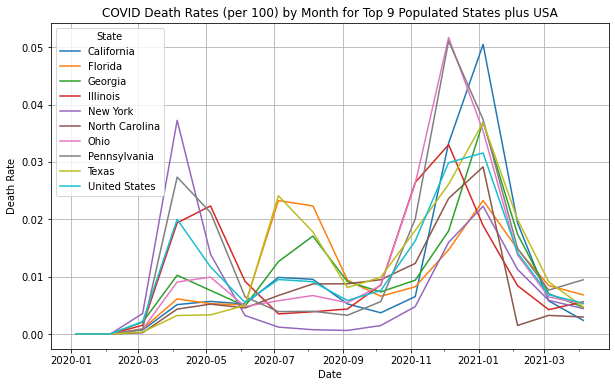

In [399]:
temp = explore.groupby(['Year/Month','State','Condition','Age Group'])[['Death Rate','Mention Rate']].sum().reset_index()
temp = temp.merge(center, how='left', left_on=['State'], right_on=['STNAME']).drop(['STNAME'], axis = 1)
allages = temp[(temp.Condition == 'COVID-19') & (temp['Age Group'] == 'All Ages')]
allages = allages[allages.State.isin(get_biggest_states(9))]
fig, ax = plt.subplots(figsize = (10,6))
allages['Date'] = matplotlib.dates.datestr2num(allages['Year/Month'])
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))
fmt_year = matplotlib.dates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_year)
fmt_month = matplotlib.dates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.set_title("COVID Death Rates (per 100) by Month for Top 9 Populated States plus USA")
plt.grid()
plot = sns.lineplot(data=allages, x="Date",y="Death Rate",hue="State",ax=ax)
plt.savefig("DeathRateTop10.png", dpi = 300)

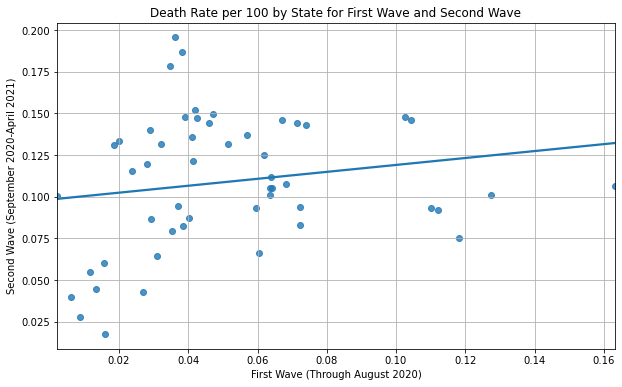

In [403]:
temp2 = explore.groupby(['Peak','State','Condition','Age Group'])[['Death Rate','Mention Rate']].sum().reset_index()
temp2.merge(center, how='left', left_on=['State'], right_on=['STNAME']).drop(['STNAME'], axis = 1)
period = temp2[(temp2.Condition == 'COVID-19') & (temp2['Age Group'] == 'All Ages')]
period = period.pivot(index = 'State', columns = 'Peak', values = 'Death Rate')
fig, ax = plt.subplots(figsize = (10,6))
plot = sns.regplot(data=period, x="First",y="Second", ax=ax, ci = None)
ax.set_xlabel("First Wave (Through August 2020)")
ax.set_ylabel("Second Wave (September 2020-April 2021)")
plt.grid()
ax.set_title("Death Rate per 100 by State for First Wave and Second Wave")
plt.savefig("FirstSecondWave.png", dpi = 300)

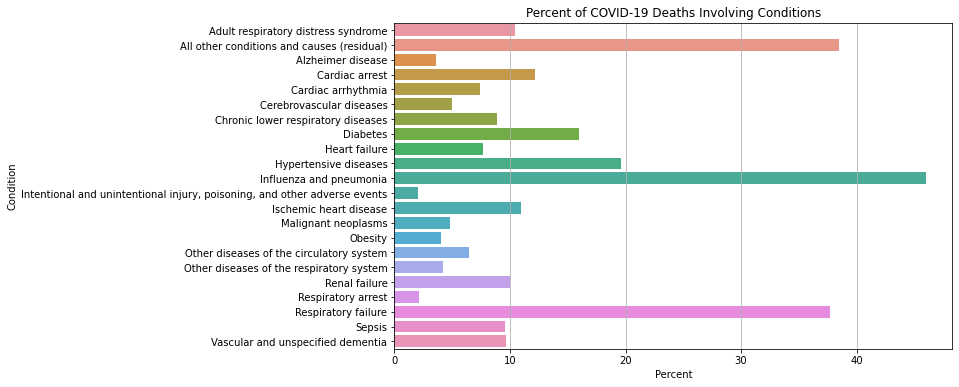

In [408]:
totald = df.query('Group == "By Total"')
totald = get_percent_of_deaths(totald)
totald['value'] = totald['value']*100
temp2 = totald[(totald['Age Group'] == 'All Ages') & (totald['State'] == 'United States') & (totald['Condition'] != 'COVID-19')]
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data=temp2, y="Condition",x="value",ax=ax)
plt.grid(axis='x')
ax.set_xlabel('Percent')
ax.set_title('Percent of COVID-19 Deaths Involving Conditions')
plt.savefig('PercentConditions.png', dpi = 300)

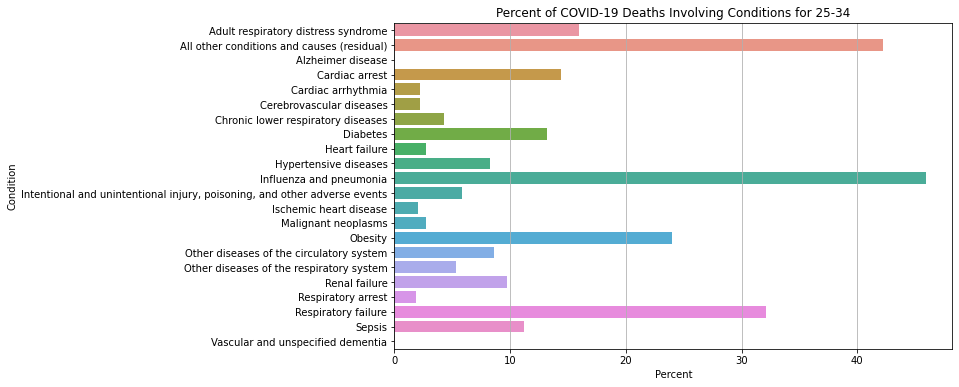

In [409]:
totald = df.query('Group == "By Total"')
totald = get_percent_of_deaths(totald)
totald['value'] = totald['value']*100
temp2 = totald[(totald['Age Group'] == '25-34') & (totald['State'] == 'United States') & (totald['Condition'] != 'COVID-19')]
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data=temp2, y="Condition",x="value",ax=ax)
plt.grid(axis='x')
ax.set_xlabel('Percent')
ax.set_title('Percent of COVID-19 Deaths Involving Conditions for 25-34')
plt.savefig('PercentConditions25-34.png', dpi = 300)

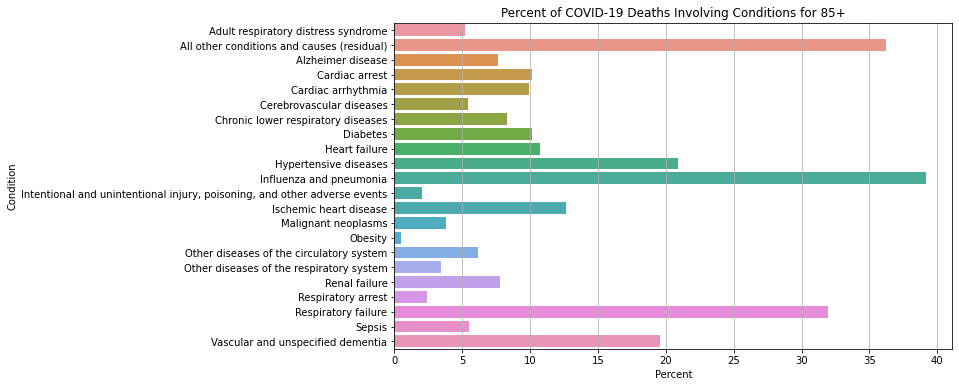

In [410]:
totald = df.query('Group == "By Total"')
totald = get_percent_of_deaths(totald)
totald['value'] = totald['value']*100
temp2 = totald[(totald['Age Group'] == '85+') & (totald['State'] == 'United States') & (totald['Condition'] != 'COVID-19')]
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data=temp2, y="Condition",x="value",ax=ax)
plt.grid(axis='x')
ax.set_xlabel('Percent')
ax.set_title('Percent of COVID-19 Deaths Involving Conditions for 25-34')
plt.savefig('PercentConditions85+.png', dpi = 300)

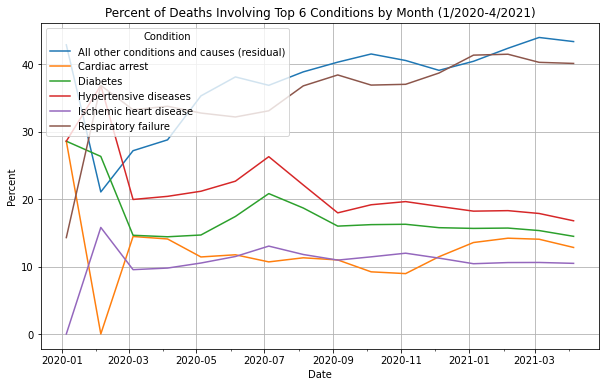

In [452]:
totald = df.query('Group == "By Month"')
totald = totald.query('State == "United States"')
totald = get_percent_of_deaths(totald)
totald = totald[(totald['Age Group'] == 'All Ages')]
totald = totald[(totald['Condition'] == 'Influenza and Pnemonia') | (totald['Condition'] == 'Respiratory failure') |
                (totald['Condition'] == 'All other conditions and causes (residual)') | (totald['Condition'] == 'Hypertensive diseases') |
                (totald['Condition'] == 'Diabetes') | (totald['Condition'] == 'Ischemic heart disease') | (totald['Condition'] == 'Cardiac arrest')]
totald = yearmonth(totald)
totald['value'] = totald['value']*100
fig, ax = plt.subplots(figsize = (10,6))
totald['Date'] = matplotlib.dates.datestr2num(totald['Year/Month'])
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))
fmt_year = matplotlib.dates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_year)
fmt_month = matplotlib.dates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.set_title("Percent of Deaths Involving Top 6 Conditions by Month (1/2020-4/2021)")
plt.grid()
plot = sns.lineplot(data=totald, x="Date",y="value",hue="Condition",ax=ax)
ax.set_ylabel('Percent')
plt.savefig("ConditionsByMonth.png", dpi = 300)

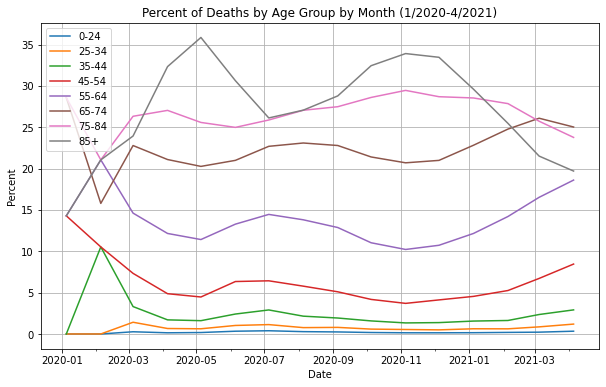

In [465]:
totald = df.query('Group == "By Month"')
totald = totald.query('State == "United States"')
totald = get_percent_of_deathsage(totald)
totald = totald[(totald['Condition'] == 'COVID-19') & (totald['Age Group'] != 'All Ages')]
totald = yearmonth(totald)
totald['value'] = totald['value']*100
fig, ax = plt.subplots(figsize = (10,6))
totald['Date'] = matplotlib.dates.datestr2num(totald['Year/Month'])
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))
fmt_year = matplotlib.dates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(fmt_year)
fmt_month = matplotlib.dates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.set_title("Percent of Deaths by Age Group by Month (1/2020-4/2021)")
plt.grid()
plot = sns.lineplot(data=totald, x="Date",y="value",hue="Age Group",ax=ax)
ax.legend(loc = "upper left")
ax.set_ylabel('Percent')
plt.savefig("AgeGroupByMonth.png", dpi = 300)

## Data Preprocessing

In [763]:
df_new = df.drop(['Death Rate','Mention Rate','Number of Mentions','Condition Group','Population'], axis = 1)
df_new = df_new.pivot(index = ['Group','Year','Month','State','Age Group'], columns = 'Condition', values = 'COVID-19 Deaths').reset_index()
df_new = df_new.merge(number2, how = 'left', left_on = ['Group','Year','Month','State', 'Age Group'], right_on = ['Group','Year','Month','State','Age Group'])
df_new = df_new.drop(['COVID-19'], axis = 1)
df_new = df_new.merge(Drate, how = 'left', left_on = ['State','Age Group'], right_on = ['State','Age Group'])
df_new = df_new.merge(AverageAge, how = 'left', left_on = ['State','Age Group'], right_on = ['State','Age Group'])
df_new = df_new.merge(AverageAgeA, how = 'left', left_on = ['State','Age Group'], right_on = ['State','Age Group'])
df_new = df_new.merge(degreematrix, how = 'left', left_on = ['State','Year','Month'], right_on = ['State','Year','Month'])
df_new = df_new.merge(population, how='left', left_on=['State','Age Group'], right_on=['NAME','AgeGroup'])
df_new = df_new.merge(center, how='left', left_on=['State'], right_on=['STNAME'])
df_new = df_new.drop(['NAME','STNAME','AgeGroup'], axis = 1)

In [764]:
conditions = ['Influenza and pneumonia', 'Chronic lower respiratory diseases',
       'Adult respiratory distress syndrome', 'Respiratory failure',
       'Respiratory arrest', 'Other diseases of the respiratory system',
       'Hypertensive diseases', 'Ischemic heart disease',
       'Cardiac arrest', 'Cardiac arrhythmia', 'Heart failure',
       'Cerebrovascular diseases',
       'Other diseases of the circulatory system', 'Sepsis',
       'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
       'Vascular and unspecified dementia', 'Renal failure',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'All other conditions and causes (residual)']

In [995]:
df_cut = cutyearmonth(df_new[(df_new['Group'] == 'By Month')])
df_cut[(df_cut['Age Group'] == '0-24') & (df_cut['State'] == 'Alabama')]
df_cut = df_cut.replace(np.nan, 0)
temp = df_cut.groupby(['State','Age Group', 'Peak']).sum().reset_index()
temp = temp.drop(['Year','Month'], axis = 1)
peak_one = temp[(temp['Peak'] == 'First') & (temp['Age Group'] != 'All Ages')]
peak_one.to_csv('OriginalPeakOne.csv')
peak_one = peak_one.drop(['State','Age Group','Peak'], axis = 1)
peak_two = temp[(temp['Peak'] == 'Second') & (temp['Age Group'] != 'All Ages')]
peak_two.to_csv('OriginalPeakTwo.csv')
peak_two = peak_two.drop(['State','Age Group','Peak'], axis = 1)
death_one = peak_one['Total Deaths'].copy()
death_two = peak_two['Total Deaths'].copy()
for i in range(28):
    peak_one[peak_one.columns[i]] = peak_one[peak_one.columns[i]]/death_one
    peak_two[peak_two.columns[i]] = peak_two[peak_two.columns[i]]/death_two
peak_one = peak_one.drop(['Population','Total Deaths'], axis = 1)
peak_two = peak_two.drop(['Population','Total Deaths'], axis = 1)

<ipython-input-970-a4a636352767>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Peak'] = (frame['Year'].astype(int)-2020)*12 + frame['Month'].astype(int)
<ipython-input-970-a4a636352767>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['Peak'] = pd.cut(frame['Peak'], bins = cuts, labels = names)


In [996]:
from sklearn.preprocessing import StandardScaler

peak_one = peak_one.dropna()
peak_two = peak_two.dropna()
transform_one = StandardScaler().fit_transform(peak_one)
transform_two = StandardScaler().fit_transform(peak_two)

In [997]:

peak_one.to_csv('PeakOneNo-PCA-Scale.csv')
peak_two.to_csv('PeakTwoNo-PCA-Scale.csv')

PermissionError: [Errno 13] Permission denied: 'PeakTwoNo-PCA-Scale.csv'

In [998]:
from pca import pca

pca1 = pca()
result_one = pca1.fit_transform(transform_one)
result_one['explained_var']

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [32] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [13] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


array([0.53745297, 0.63846236, 0.71597287, 0.76292785, 0.8004649 ,
       0.83025908, 0.85823106, 0.88118999, 0.90159807, 0.91827419,
       0.93309129, 0.94367605, 0.95267296, 0.95889119, 0.96464791,
       0.96960754, 0.97410188, 0.97836692, 0.98184487, 0.98501803,
       0.98789617, 0.99037841, 0.9925911 , 0.99438903, 0.9960044 ,
       0.99739664, 0.9983563 , 0.99922713, 0.99980413, 0.99997631,
       0.99999571, 1.        ])

In [999]:
round(result_one['loadings'],3)

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
PC1,0.121,0.223,0.138,0.170,0.204,0.209,0.207,0.185,0.199,0.179,...,0.226,0.201,0.205,0.101,0.216,0.116,0.148,0.148,-0.050,0.057
PC2,0.283,0.061,-0.334,0.147,-0.206,-0.074,-0.084,0.238,-0.231,0.120,...,0.093,0.089,0.210,0.045,0.048,-0.345,-0.203,-0.207,-0.122,0.035
PC3,0.254,-0.006,0.018,-0.170,-0.135,-0.171,-0.071,0.112,-0.088,0.193,...,0.072,0.281,0.165,-0.014,0.182,0.293,0.360,0.360,0.011,-0.078
PC4,0.326,-0.132,0.127,-0.196,0.095,0.042,0.126,0.193,0.079,0.375,...,-0.032,-0.104,0.101,-0.299,-0.137,-0.084,-0.252,-0.249,0.025,0.242
PC5,-0.220,-0.048,0.073,-0.330,0.065,0.057,0.126,0.147,0.036,0.137,...,-0.074,0.020,-0.081,0.402,-0.010,0.001,-0.037,-0.036,-0.535,-0.035
PC6,0.039,-0.088,-0.105,-0.047,0.048,0.085,0.096,0.170,-0.032,0.148,...,-0.124,-0.053,-0.011,0.110,-0.120,-0.064,0.048,0.046,0.418,-0.751
PC7,0.094,-0.011,0.223,0.133,0.026,-0.084,-0.132,-0.101,0.053,-0.035,...,0.055,-0.018,0.102,-0.375,-0.019,0.077,-0.116,-0.111,-0.564,-0.560
PC8,-0.190,0.114,-0.060,-0.178,0.014,0.129,0.198,0.115,0.128,0.030,...,0.030,-0.085,-0.078,-0.541,-0.007,0.000,0.045,0.043,0.097,-0.009
PC9,0.052,0.048,0.378,0.072,-0.046,-0.217,-0.178,-0.006,0.112,-0.009,...,0.113,-0.067,0.065,0.024,0.003,0.093,-0.127,-0.123,0.374,0.030
PC10,-0.105,-0.094,-0.280,0.013,-0.060,-0.069,-0.044,0.016,-0.168,0.003,...,0.015,0.022,-0.086,-0.420,0.070,0.123,0.212,0.210,-0.116,0.144


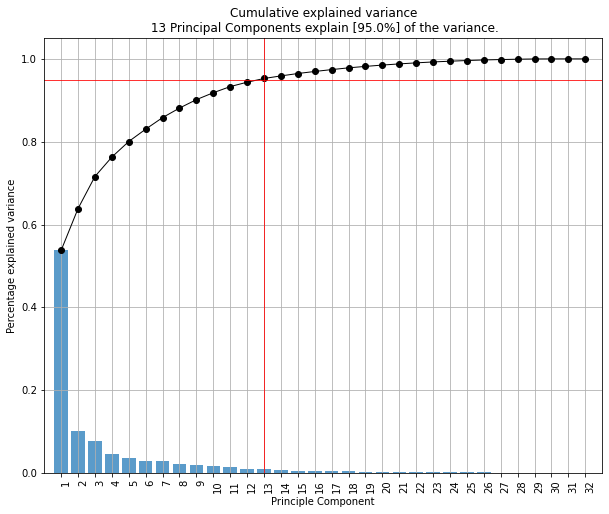

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 13 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [1000]:
pca1.plot()

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'13 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (53.7% expl.var)', ylabel='PC2 (10.1% expl.var)'>)

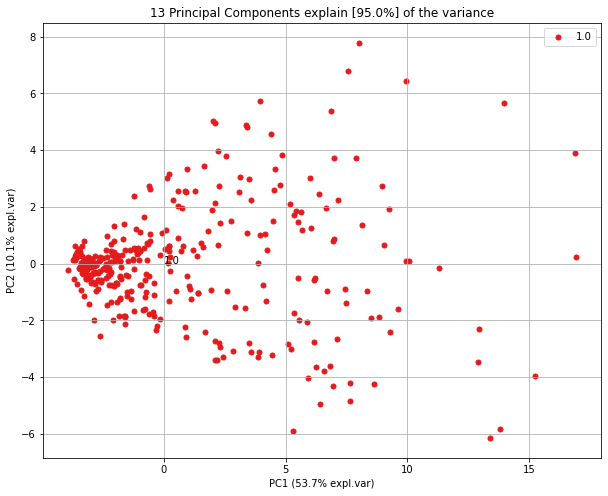

In [1001]:
pca1.scatter()

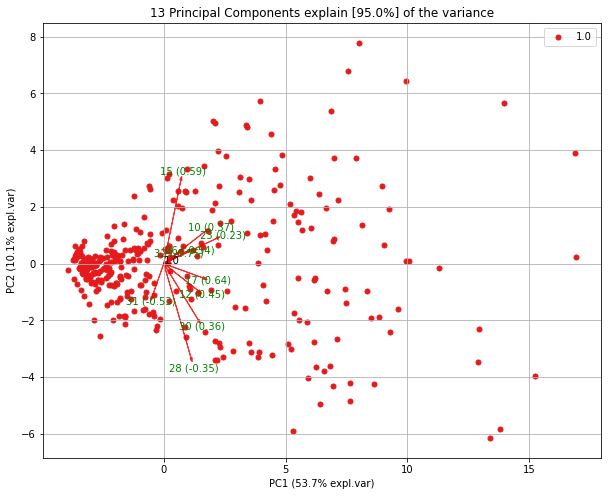

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'13 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (53.7% expl.var)', ylabel='PC2 (10.1% expl.var)'>)

In [1002]:
pca1.biplot(n_feat=10)

In [1003]:
pca_transform_one = pca1.transform(transform_one)
pca_transform_one

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
1.0,-3.483182,0.470049,-1.643006,1.100909,0.587026,-0.805316,0.768470,-0.149181,-0.309362,-0.233250,...,-0.068725,0.040755,0.009392,0.010975,-0.064981,-0.003012,0.021151,-0.019472,0.005888,-0.008110
1.0,-3.126787,0.191509,-0.956405,0.645796,0.532535,-0.795081,0.589190,-0.106163,-0.508736,0.118159,...,-0.057023,0.068876,0.005580,0.033607,-0.074759,-0.071533,0.019906,0.095523,0.004303,-0.014307
1.0,-2.480756,0.184396,-0.221881,0.214302,0.443252,-0.998317,0.514098,-0.110612,-0.561992,0.388088,...,-0.121883,-0.168870,0.186592,0.001596,0.359737,-0.011370,0.099669,-0.182296,-0.011515,-0.006403
1.0,-1.153453,0.510831,0.405761,-0.546390,0.035746,-1.461261,0.641250,0.137681,-0.399793,0.244357,...,0.259106,-0.245006,0.053975,0.036117,0.216641,-0.315475,-0.081937,-0.046147,-0.017999,-0.002505
1.0,1.800233,1.159108,-0.994810,-2.351033,-1.346767,-1.266404,0.466911,-2.678716,-0.993609,0.172358,...,0.328534,0.156026,0.328673,-0.327364,-0.081539,0.023742,-0.096340,0.017821,-0.015730,0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,-3.135585,-0.472327,-0.344011,0.062707,-0.365852,0.832365,0.099153,0.161297,-0.123619,0.115651,...,0.114368,0.069708,-0.097580,-0.008328,-0.078007,0.002392,-0.037272,-0.066013,-0.000526,-0.002584
1.0,-2.995421,-0.690311,-0.001076,-0.160398,-0.397079,0.864398,0.012374,0.198956,-0.218045,0.310196,...,0.153601,0.094656,-0.126838,-0.018022,-0.090801,0.013441,-0.044523,-0.076939,-0.000631,0.014147
1.0,-2.784615,-0.963806,0.434191,-0.424145,-0.429014,0.852150,-0.057599,0.233104,-0.286509,0.539532,...,0.150030,0.074945,-0.106751,-0.036791,-0.018044,0.022754,-0.015089,0.080923,0.005009,0.011717
1.0,-2.342361,-1.463396,1.299860,-0.831916,-0.448421,0.752811,-0.080111,0.213731,-0.326580,0.889227,...,-0.033802,0.075771,-0.076498,0.045646,-0.098280,-0.010450,0.029184,-0.018496,-0.009281,-0.005291


In [1004]:
pca2 = pca()
result_two = pca2.fit_transform(transform_two)
result_two['explained_var']

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [32] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [13] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


array([0.5727047 , 0.68476103, 0.74208755, 0.77785619, 0.811154  ,
       0.84086098, 0.86852261, 0.88799162, 0.90730903, 0.9246669 ,
       0.9397092 , 0.9484417 , 0.95578495, 0.96257542, 0.96853713,
       0.97325114, 0.97762284, 0.98109708, 0.98391687, 0.98640444,
       0.98878447, 0.99079757, 0.99273414, 0.994374  , 0.9958347 ,
       0.9970957 , 0.99827651, 0.99924343, 0.99986745, 0.99997609,
       0.99999578, 1.        ])

In [1005]:
round(result_two['loadings'], 3)

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
PC1,0.120,0.214,0.133,0.147,0.200,0.204,0.203,0.194,0.196,0.192,...,0.217,0.209,0.209,0.027,0.215,0.154,0.187,0.187,-0.034,0.012
PC2,0.282,0.045,-0.340,0.221,-0.218,-0.139,-0.093,0.176,-0.237,-0.009,...,0.056,0.144,0.169,0.056,0.058,-0.310,-0.110,-0.114,-0.142,-0.026
PC3,-0.186,-0.147,0.014,0.121,0.117,0.203,0.019,0.014,0.084,-0.003,...,-0.186,-0.217,-0.170,0.285,-0.213,-0.160,-0.291,-0.289,-0.155,0.112
PC4,0.040,-0.082,-0.022,0.366,-0.023,-0.062,-0.208,-0.270,-0.030,-0.216,...,0.031,0.049,0.031,0.024,0.040,0.173,0.094,0.097,-0.427,0.263
PC5,0.120,-0.056,0.130,0.142,-0.021,-0.019,-0.131,-0.041,-0.011,-0.041,...,-0.014,0.009,0.017,0.428,-0.011,0.111,0.063,0.065,0.049,-0.780
PC6,-0.046,0.065,-0.143,0.027,-0.061,-0.068,0.008,-0.082,-0.067,-0.140,...,0.048,0.026,0.006,0.623,0.057,-0.013,0.153,0.149,0.577,0.374
PC7,0.023,0.005,0.099,-0.295,-0.022,-0.045,-0.055,0.065,-0.004,0.185,...,0.062,0.082,0.033,0.477,0.082,0.109,0.036,0.038,-0.549,0.255
PC8,0.517,-0.053,-0.021,0.005,0.067,0.082,0.190,0.032,0.074,0.165,...,-0.113,0.016,0.058,0.229,-0.113,-0.104,-0.172,-0.170,-0.077,-0.046
PC9,-0.312,0.027,-0.361,-0.260,0.018,0.031,0.212,-0.106,-0.079,-0.226,...,-0.054,0.014,-0.067,0.093,-0.003,0.014,0.250,0.245,-0.299,-0.272
PC10,-0.363,0.193,0.166,-0.171,-0.032,-0.032,0.189,0.113,0.047,-0.016,...,0.157,0.029,0.037,0.176,0.129,-0.217,-0.198,-0.199,-0.070,-0.090


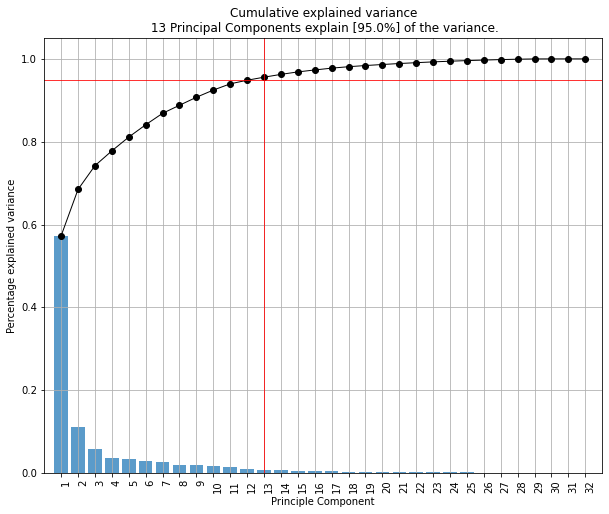

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 13 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [1006]:
pca2.plot()

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'13 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (57.2% expl.var)', ylabel='PC2 (11.2% expl.var)'>)

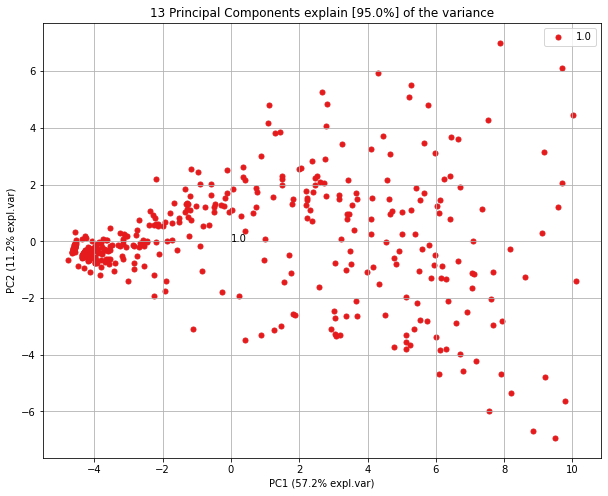

In [1007]:
pca2.scatter()

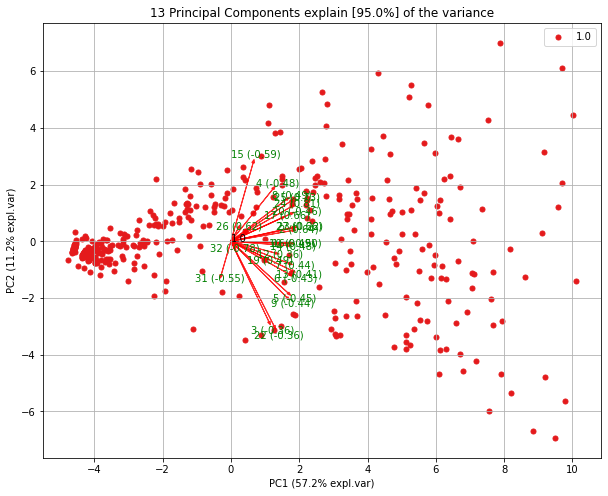

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'13 Principal Components explain [95.0%] of the variance'}, xlabel='PC1 (57.2% expl.var)', ylabel='PC2 (11.2% expl.var)'>)

In [1008]:
pca2.biplot()

In [1009]:
pca_transform_two = pca2.transform(transform_two)
pca_transform_two

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
1.0,-4.547054,-0.095072,1.421711,0.356224,-0.522840,-0.980779,0.482560,0.588025,-0.176557,0.265136,...,0.056510,0.044206,0.105808,0.006390,-0.057032,0.063441,-0.010926,-0.003763,0.002121,-0.008456
1.0,-4.145085,-0.242105,0.870094,0.525651,-0.429197,-0.724334,0.582970,0.266375,0.186387,0.034557,...,-0.001128,0.021139,0.012826,-0.015851,-0.083413,-0.032343,-0.125732,0.149730,0.018057,-0.011921
1.0,-3.075345,0.169747,0.092069,1.031819,-0.301529,-0.419034,0.499474,-0.091325,0.156074,0.185097,...,0.136822,-0.160451,0.095638,0.064114,-0.309572,-0.220603,-0.265426,0.017811,-0.002988,-0.002569
1.0,-0.763642,1.225019,-0.273966,2.176873,-0.095278,-0.100730,-0.318464,-0.286875,0.104407,1.147072,...,0.108955,0.109700,-0.306522,-0.122398,-0.457125,-0.200052,-0.112535,-0.069489,-0.001467,-0.005053
1.0,2.218143,1.471758,1.251209,4.110791,0.285075,0.039596,-2.200762,-0.569702,-0.265147,2.840100,...,0.074290,0.050493,-0.226302,0.186004,-0.053861,0.246707,-0.114636,0.000621,-0.001548,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,-3.992646,-0.698433,0.091430,-0.293334,0.621215,0.041771,-0.555347,-0.053737,0.430881,-0.417707,...,-0.286315,0.079351,-0.124192,-0.024832,0.245565,0.112799,-0.113447,-0.048858,-0.004762,-0.001285
1.0,-3.146821,-0.625537,-0.770821,-0.151343,0.632444,0.329675,-0.325673,-0.467570,0.614705,-0.188327,...,0.057935,-0.238675,0.019951,0.131425,-0.236994,0.039631,-0.117402,-0.038548,-0.018943,0.011391
1.0,-1.232011,0.172081,-2.459232,0.174717,0.709158,0.676893,0.049114,-0.736799,0.574556,0.298706,...,0.293681,-0.409464,0.068572,-0.185994,0.275653,0.876432,-0.406186,-0.049947,0.077685,0.006583
1.0,0.976465,-0.674357,-3.313797,-0.504845,0.300283,0.734310,0.382301,-0.355582,1.175186,0.989077,...,0.290107,-0.714563,0.174290,0.209911,1.023747,-0.224629,-0.178959,-0.054409,0.038213,-0.001575


In [1010]:
final_one = pca_transform_one.iloc[:,1:13]
final_two = pca_transform_two.iloc[:,1:13]

In [1011]:
final_one.to_csv('PeakOnePCA-Top13.csv')
final_two.to_csv('PeakTwoPCA-Top13.csv')